In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans 

In [2]:
df=pd.read_excel(r'C:\Users\cheth\OneDrive\Desktop\ExcelR\Assignments\Cluestering\EastWestAirlines.xlsx',sheet_name='data')
df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
df.drop(['ID#','Award?','cc1_miles','cc2_miles','cc3_miles'],axis=1,inplace=True)

In [5]:
scaler=StandardScaler()

In [6]:
scaled_df=scaler.fit_transform(df)
scaled_df

array([[-4.51140783e-01, -1.86298687e-01, -7.02786266e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.39545434e+00],
       [-5.39456874e-01, -1.86298687e-01, -7.01088399e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.37995704e+00],
       [-3.20031232e-01, -1.86298687e-01, -5.39252702e-01, ...,
        -3.28603258e-01, -3.62167870e-01,  1.41192021e+00],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  3.43803696e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31560393e+00],
       [-1.85606976e-01, -1.86298687e-01, -6.89286154e-01, ...,
         2.85309024e-02, -9.85033311e-02, -1.31608822e+00],
       [-7.00507951e-01, -1.86298687e-01, -7.09991847e-01, ...,
        -3.28603258e-01, -3.62167870e-01, -1.31754109e+00]])

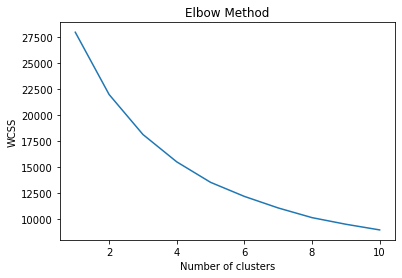

In [9]:
wcss=[]
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    Kmeans.fit(scaled_df)
    wcss.append(Kmeans.inertia_)
    
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
clusters_new=KMeans(4,random_state=42)

In [11]:
clusters_new.fit(scaled_df)

KMeans(n_clusters=4, random_state=42)

In [13]:
df['Clusterid_new']=clusters_new.labels_

In [14]:
clusters_new.cluster_centers_

array([[-0.34618337, -0.1308493 , -0.48603613, -0.50398992, -0.19485199,
        -0.21330814, -0.28242424],
       [ 0.51924455, -0.10442654,  0.85981602,  0.78643454, -0.06949478,
        -0.06904477,  0.53818531],
       [ 0.39187235,  6.91711323,  0.08865315,  0.07557172,  0.35034573,
         0.37427446, -0.13674898],
       [ 1.26291369,  0.39262812,  0.88080972,  1.77552908,  3.60766956,
         3.89558917,  0.26826037]])

In [16]:
df.groupby('Clusterid_new').agg(['mean']).reset_index()

,Clusterid_new,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
,,mean,mean,mean,mean,mean,mean,mean
0,0,38824.972716,43.057730,5430.760775,6.771847,186.886121,0.563464,3539.097272
1,1,126055.317422,63.085123,37991.262530,19.183771,364.203660,1.116150,5229.123309
2,2,113087.586207,5494.965517,19285.637931,12.327586,950.551724,2.793103,3836.189655
3,3,200856.380645,447.838710,38414.593548,28.651613,5510.916129,16.148387,4672.483871


In [18]:
df.groupby('Clusterid_new').count()

,Balance,Qual_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
Clusterid_new,,,,,,,
0,2529,2529,2529,2529,2529,2529,2529
1,1257,1257,1257,1257,1257,1257,1257
2,58,58,58,58,58,58,58
3,155,155,155,155,155,155,155


In [ ]:
# We can see the elbow after k value =4, so had choosen 4 clusters.
# in Cluster 0 we see maximum number of data points.
# And in cluster 2 minimum data points.